In [3]:
import pandas as pd
import numpy as np

In [3]:
gentrification = pd.read_csv('2009_2013_normed_cleaned_bigger.csv', encoding='utf-8')

In [4]:
gentrification.columns.size

496

In [5]:
gentrification.shape

(3874, 496)

In [6]:
# list(gentrification.columns.unique())

In [7]:
gentrification.columns = [x.strip().replace(' ', '_') for x in gentrification.columns]

In [8]:
gentrification.columns = [x.strip().replace( ';' , '_') for x in gentrification.columns]

In [9]:
gentrification.columns = [x.strip().replace( '-' , '') for x in gentrification.columns]

In [10]:
gentrification.columns = [x.strip().replace( ':' , '') for x in gentrification.columns]

In [11]:
gentrification.columns = [x.strip().replace( '(' , '') and x.strip().replace( ')' , '') for x in gentrification.columns]

In [183]:
gentrification.GENTRIFIED.dtype

dtype('bool')

In [184]:
gentrification.GENTRIFIED = gentrification.GENTRIFIED.apply(lambda x: x.astype(np.int64))

In [185]:
median_features = gentrification.dropna().median()
# mean_features = gentrification.dropna().mean()

In [186]:
imputed_features = gentrification.fillna(median_features) #fill missing values with median
# imputed_mean_features = gentrification.fillna(mean_features)

In [187]:
imputed_features = imputed_features.replace(-9223372036854775808, 0)

In [188]:
imputed_features = imputed_features.replace(-9223372036854770000, 0)

In [189]:
for col in imputed_features.columns.values:
    imputed_features[col] = imputed_features[col].replace(-9223372036854770000, 0)
for col in imputed_features.columns.values:
    imputed_features[col] = imputed_features[col].replace(-9223372036854775808, 0)

In [190]:
imputed_features = imputed_features.loc[:, (imputed_features != 0).any(axis=0)] #To "delete" the zero-columns, reassign imputed_features

In [191]:
imputed_features.shape

(3874, 496)

In [197]:
# imputed_features.drop(imputed_features.columns[[0]], axis=1, inplace=True) #take out Geography
imputed_features.drop(imputed_features.columns[[1]], axis=1, inplace=True) #take out city

In [198]:
imputed_features.head(3)

,GENTRIFIED,ACS_09_B08303_HD01_VD01_Estimate__Total_100scale,ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale,ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale,ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale,ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale,ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale,ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale,ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale,ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale,...,ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC24_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC24_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC25_Total__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC25_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC25_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC27_Total__Estimate__PERCENT_IMPUTED__Food_stamp/SNAP_recipiency_100scale
0,0,16.05,13.81,12.47,25.27,17.35,9.99,20.52,15.69,18.28,...,19.1,37.8,12.96,45.0,44.0,45.5,35.9,18.3,45.0,4.70
1,0,10.94,18.57,14.84,14.52,8.59,16.21,1.89,0.82,13.44,...,5.6,12.7,0.00,54.8,73.3,40.1,39.5,13.9,59.9,36.91
2,0,5.89,0.00,4.09,5.56,5.50,5.79,12.50,8.63,7.53,...,24.5,38.7,17.05,43.1,56.3,31.9,32.4,5.0,55.5,16.11


In [199]:
imputed_features = imputed_features.applymap(np.int64)

In [200]:
imputed_features.shape #dropped 2 columns and 1 column with zeroes

(3874, 493)

In [ ]:
imputed_features.to_csv("larger_imputed_features.csv", encoding='utf-8', index=False)

In [4]:
cleaned_features = pd.read_csv("larger_imputed_features.csv", encoding='utf-8')

In [5]:
target = cleaned_features.GENTRIFIED.values

In [6]:
cleaned_features.drop('GENTRIFIED', axis=1, inplace=True)

In [7]:
features_array  = cleaned_features.values

In [8]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [18]:
target_predicted = logreg.predict(features_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.82064516129032261

In [20]:
logreg.score(features_test, target_test)

0.82064516129032261

In [21]:
feature_names = cleaned_features.columns

In [22]:
feature_names

Index(['ACS_09_B08303_HD01_VD01_Estimate__Total_100scale',
       'ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale',
       'ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale',
       'ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale',
       'ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale',
       'ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale',
       'ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale',
       'ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale',
       'ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale',
       'ACS_09_B08303_HD01_VD10_Estimate__40_to_44_minutes_100scale', 
       ...
       'ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC03_EST_VC23_Househ

In [23]:
logreg.coef_

array([[ -1.32192363e-01,   2.46496537e-03,   8.25235887e-03,
          6.57048975e-03,   1.37453253e-02,   4.07365818e-03,
          1.61951893e-02,   1.20583042e-02,  -7.76725334e-03,
          2.24330010e-03,   1.43661150e-02,   1.08384827e-02,
         -8.02680699e-03,   1.59489865e-01,   4.51435981e-02,
         -1.70868539e-02,  -1.48622070e-03,  -1.65731002e-03,
          6.67013480e-03,  -5.74600470e-04,  -1.77018442e-02,
         -1.62002483e-02,  -9.22481321e-03,  -1.10691134e-02,
         -1.90846997e-03,  -5.92147697e-04,  -1.83753553e-04,
          4.73299401e-03,  -9.86617966e-03,   4.44635327e-03,
         -1.13450400e-01,   1.36705838e-01,   1.53366502e-04,
         -9.90778397e-04,  -2.22976921e-03,  -1.47673204e-02,
         -2.36852505e-03,  -6.13059670e-03,   4.43318169e-04,
         -1.66743438e-02,  -7.48561974e-03,  -2.62990773e-02,
         -1.23763427e-02,  -3.23025926e-02,  -2.86224962e-03,
         -3.32067338e-02,  -3.21074984e-02,   2.72870267e-02,
        

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[628  54]
 [ 85   8]]


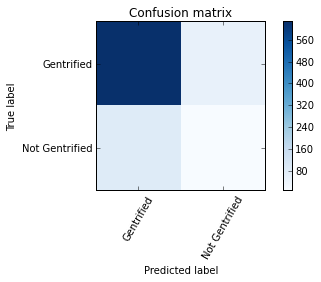

In [25]:
% matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion(cm, target_names = ['Gentrified', 'Not Gentrified'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [26]:
cm.sum(axis=1)

array([682,  93])

In [27]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.92082111  0.07917889]
 [ 0.91397849  0.08602151]]


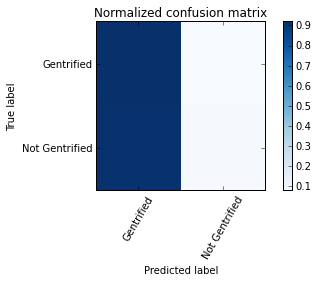

In [28]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [29]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['Gentrified', 'Not Gentrified']))

                precision    recall  f1-score   support

    Gentrified       0.88      0.92      0.90       682
Not Gentrified       0.13      0.09      0.10        93

   avg / total       0.79      0.82      0.80       775



In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

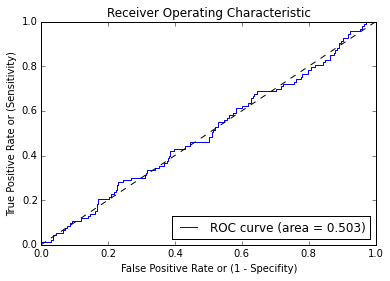

In [31]:
target_predicted_prob = logreg.predict_proba(features_test)
plot_roc_curve(target_test,target_predicted_prob)

In [32]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=3)

In [33]:
scores

array([ 0.7755418 ,  0.73973664,  0.83346243])

In [34]:
scores.min(), scores.max(), scores.mean()

(0.73973663826491087, 0.83346243222308292, 0.78291362205120951)

In [35]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.52206896956672366, 0.52842301806465086, 0.53695976680496948)

In [228]:
# Here's what I've done to adapt RandomForestClassifier to work with RFECV:
# Just using this class does the trick if you use 'accuracy' or 'f1' score. For 'roc_auc', RFECV complains 
# that multiclass format is not supported. Changing it to two-class classification with the code below, the
# 'roc_auc' scoring works. (Using Python 3.4.1 and scikit-learn 0.15.1)

#http://stackoverflow.com/questions/24123498/recursive-feature-elimination-on-random-forest-using-scikit-learn?rq=1

from sklearn import datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV


def get_enhanced_confusion_matrix(actuals, predictions, labels):
    """"enhances confusion_matrix by adding sensivity and specificity metrics"""
    cm = confusion_matrix(actuals, predictions, labels = labels)
    sensitivity = float(cm[1][1]) / float(cm[1][0]+cm[1][1])
    specificity = float(cm[0][0]) / float(cm[0][0]+cm[0][1])
    weightedAccuracy = (sensitivity * 0.9) + (specificity * 0.1)
    return cm, sensitivity, specificity, weightedAccuracy


x= features_array
print(x.shape)
y= target
print(target.shape)


class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=100, min_samples_leaf=5, n_jobs=-1)
rfecv = RFECV(estimator=rf, step=1, cv=2, scoring='roc_auc', verbose=2)
selector=rfecv.fit(x, y)


(3874, 492)
(3874,)
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
Fitting estimator with 467 features.
Fitting estimator 

KeyboardInterrupt: 

[0.33047221090455881, 0.33043722960498834, 0.33051589667022274, 0.33030216378372101, 0.3303238136200019, 0.33016217560246386, 0.33026801682566487, 0.33034654817044218, 0.33025220712996078, 0.33026089812260928, 0.33025417569346832, 0.33022705355071824, 0.33011456877369427, 0.33008251886886736, 0.33010409655927553, 0.33014749580202146, 0.33011334369174222, 0.33004077215252731, 0.33002460522640814, 0.33001124411962457, 0.33004522173913903, 0.3300569868604375, 0.33006113663213793, 0.33002843033032214, 0.33000563350976664, 0.33007355882304301, 0.3301375173915686, 0.33015929243869641, 0.33012329995620499, 0.33014665526865655, 0.33015593326951265, 0.33015427693459826, 0.33016843352075648, 0.3301795339816076, 0.33019744157241843, 0.33024807640082959, 0.33026119919243324, 0.33033076710789472, 0.33032544976692158, 0.33033161202832789]


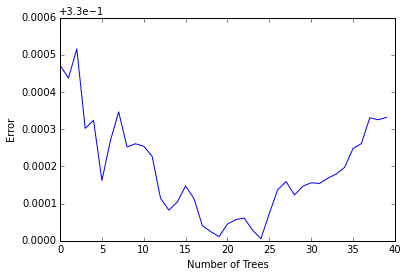

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier


errors = []
growing_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,  
                                    warm_start=True, random_state=1000, min_samples_leaf=100)
for i in range(40):
    growing_rf.fit(features_train, target_train)
    growing_rf.n_estimators += 10
    errors.append(log_loss(target, growing_rf.predict_proba(features_array)))
print(errors)

_ = plt.plot(errors, '-r')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

Feature ranking:
1. feature 419 (0.005544)
2. feature 417 (0.005292)
3. feature 271 (0.004476)
4. feature 220 (0.003348)
5. feature 356 (0.003241)
6. feature 430 (0.003140)
7. feature 354 (0.003076)
8. feature 118 (0.003064)
9. feature 441 (0.003064)
10. feature 182 (0.003053)


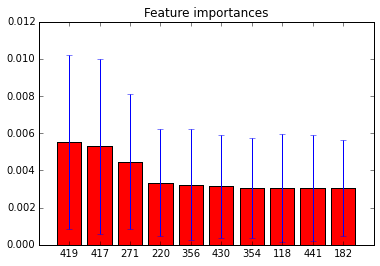

In [36]:
from sklearn.ensemble import ExtraTreesClassifier


extra_forest = ExtraTreesClassifier(n_estimators=100, max_depth=None,
min_samples_split=1, random_state=1000)
# scores = cross_val_score(extra_forest, features_train, target_train)
extra_forest.fit(features_train, target_train)
importances = extra_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in extra_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][0:10],
       color="r", align="center", yerr=std[indices][0:10])
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [45]:
import operator

feature_cols = dict(zip(cleaned_features.columns, extra_forest.feature_importances_))

sorted_feature_cols = sorted(feature_cols.items(), key=operator.itemgetter(1))

sorted_feature_cols

[('ACS_09_S1301_HC05_EST_VC11_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
  0.0),
 ('ACS_09_B12002_HD01_VD68_Estimate__Male__Widowed__20_to_24_years_100scale',
  2.1261049880110732e-05),
 ('ACS_09_B12002_HD01_VD160_Estimate__Female__Widowed__18_and_19_years_100scale',
  2.5513259856132876e-05),
 ('ACS_09_S1301_HC03_EST_VC11_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
  0.0002377554665910621),
 ('ACS_09_B12002_HD01_VD81_Estimate__Male__Divorced__15_to_17_years_100scale',
  0.00026344301303467905),
 ('ACS_09_B12002_HD01_VD159_Estimate__Female__Widowed__15_to_17_years_100scale',
  0.00026533554318686312),
 ('ACS_09_S1301_HC04_EST_VC11_Women_with_births_in_the_past_12_months__Rate_per_1,000_wom

Feature ranking:
1. feature 417 (0.007911)
2. feature 419 (0.007096)
3. feature 208 (0.004897)
4. feature 227 (0.004719)
5. feature 408 (0.004562)
6. feature 435 (0.004523)
7. feature 414 (0.004477)
8. feature 485 (0.004409)
9. feature 356 (0.004319)
10. feature 170 (0.004262)


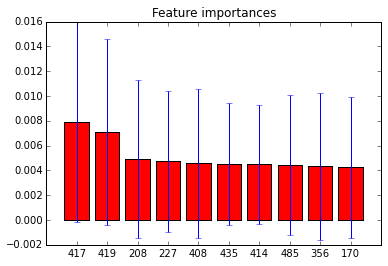

In [37]:
from sklearn.ensemble import RandomForestClassifier


RF = RandomForestClassifier(n_estimators=100, max_depth=None,
min_samples_split=1, random_state=1000)
# scores = cross_val_score(extra_forest, features_train, target_train)
RF.fit(features_train, target_train)
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][0:10],
       color="r", align="center", yerr=std[indices][0:10])
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [46]:
import operator

feature_cols_randomforest = dict(zip(cleaned_features.columns, RF.feature_importances_))

sorted_feature_cols_RF = sorted(feature_cols_randomforest.items(), key=operator.itemgetter(1))

sorted_feature_cols_RF

[('ACS_09_B12002_HD01_VD160_Estimate__Female__Widowed__18_and_19_years_100scale',
  0.0),
 ('ACS_09_B12002_HD01_VD81_Estimate__Male__Divorced__15_to_17_years_100scale',
  0.0),
 ('ACS_09_B12002_HD01_VD68_Estimate__Male__Widowed__20_to_24_years_100scale',
  0.0),
 ('ACS_09_S1301_HC05_EST_VC11_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
  0.0),
 ('ACS_09_S1301_HC04_EST_VC11_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
  2.7968948440664009e-05),
 ('ACS_09_S1301_HC05_EST_VC09_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__American_Indian_and_Alaska_Native_100scale',
  5.368705

In [254]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

Wall time: 3min 41s


In [257]:
sorted(gs.grid_scores_, key = lambda x: x.mean_validation_score, reverse=True)

[mean: 0.64353, std: 0.02936, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.63112, std: 0.01441, params: {'max_features': 0.5, 'learning_rate': 0.05, 'max_depth': 4},
 mean: 0.62404, std: 0.01508, params: {'max_depth': 3, 'learning_rate': 0.1, 'max_features': 0.5},
 mean: 0.62250, std: 0.01933, params: {'max_depth': 5, 'learning_rate': 0.05, 'max_features': 0.5},
 mean: 0.60943, std: 0.03761, params: {'max_features': 0.5, 'learning_rate': 0.1, 'max_depth': 4},
 mean: 0.59730, std: 0.02453, params: {'max_depth': 5, 'learning_rate': 0.1, 'max_features': 0.5},
 mean: 0.58201, std: 0.03429, params: {'max_features': 1, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.57399, std: 0.01085, params: {'max_features': 0.5, 'learning_rate': 0.5, 'max_depth': 3},
 mean: 0.57293, std: 0.02272, params: {'max_depth': 4, 'learning_rate': 0.1, 'max_features': 1},
 mean: 0.57274, std: 0.03048, params: {'max_features': 1, 'learning_rate': 0.1, 'max_depth': 5},
 mean: 0.568

Optimal number of features : 1


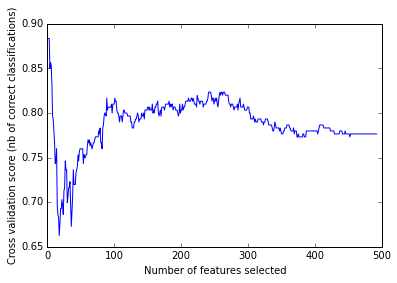

In [49]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV


# Build a classification task 
X, y = features_array[:300], target[:300]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()